# Open University data analysis

This is a simple analysis of dataset related to Open Univeristy student information.
The focus is on general student information: studentInfo.csv

The dataset has been downoaded from the Open University
https://analyse.kmi.open.ac.uk/open_dataset




In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv as csv

# import scipy and statsmodels libraries to use inbuild stats functions
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

# read the csv file 
df = pd.read_csv('studentInfo.csv')
assessment = pd.read_csv('studentAssessment.csv')


In [2]:
# get info about data: column names and number of rows
print(df.shape)
print(df.columns)
print(df.info())

(32593, 12)
Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
code_module             32593 non-null object
code_presentation       32593 non-null object
id_student              32593 non-null int64
gender                  32593 non-null object
region                  32593 non-null object
highest_education       32593 non-null object
imd_band                31482 non-null object
age_band                32593 non-null object
num_of_prev_attempts    32593 non-null int64
studied_credits         32593 non-null int64
disability              32593 non-null object
final_result            32593 non-null object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB
None


In [3]:
# overview of data fields
print(df.head(10))

  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   
5         AAA             2013J       38053      M                 Wales   
6         AAA             2013J       45462      M              Scotland   
7         AAA             2013J       45642      F  North Western Region   
8         AAA             2013J       52130      F   East Anglian Region   
9         AAA             2013J       53025      M          North Region   

             highest_education imd_band age_band  num_of_prev_attempts  \
0             HE Qualification  90-100%     55<=                     0   
1             H

In [4]:
total = float(len(df))
def show_perc(ax):
    for p in ax.patches:
        if p!=0:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format((height/total)*100),
                ha="center") 
        else:
            height = 0
            ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format((height/total)*100),
                ha="center") 

# Student profile distribution
As a first step, I would like to summarise the numbers:
    gender, 
    age, 
    disability,
    region,
    highest education,
    imd_band

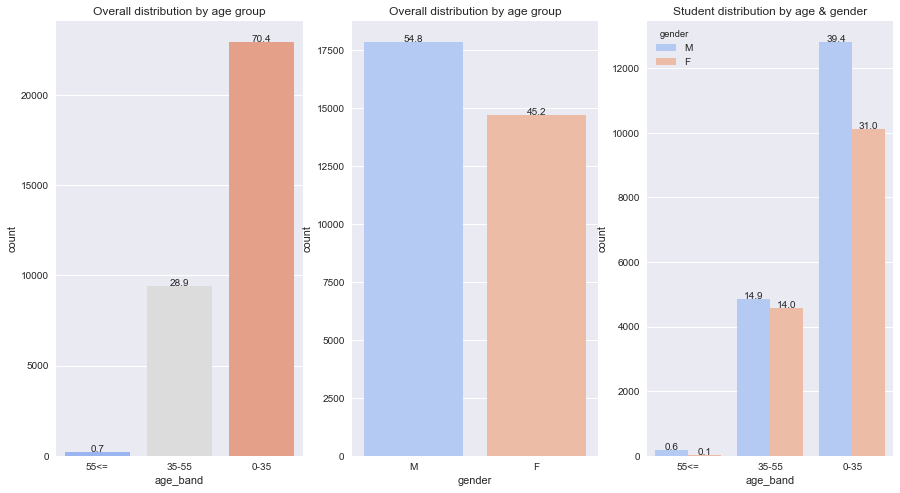

In [15]:
# plot all participants by age and gender
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(1,3,1)
g = sns.countplot('age_band', data=df, palette="coolwarm")
g.set_title("Overall distribution by age group")
show_perc(ax1)

ax2 = fig.add_subplot(1,3,2)
g = sns.countplot('gender', data=df, palette="coolwarm")
g.set_title("Overall distribution by age group")
show_perc(ax2)

# split participants by age and gender
ax3 = fig.add_subplot(1,3,3)
g = sns.countplot('age_band', data=df, palette="coolwarm", hue='gender')
g.set_title("Student distribution by age & gender")
show_perc(ax3)

# What can we see?

* Most students are younger than 35
* Gender gap is highest for students younger than 35.
* Disability gap is highest for students younger than 35.

# Final result by age and gender

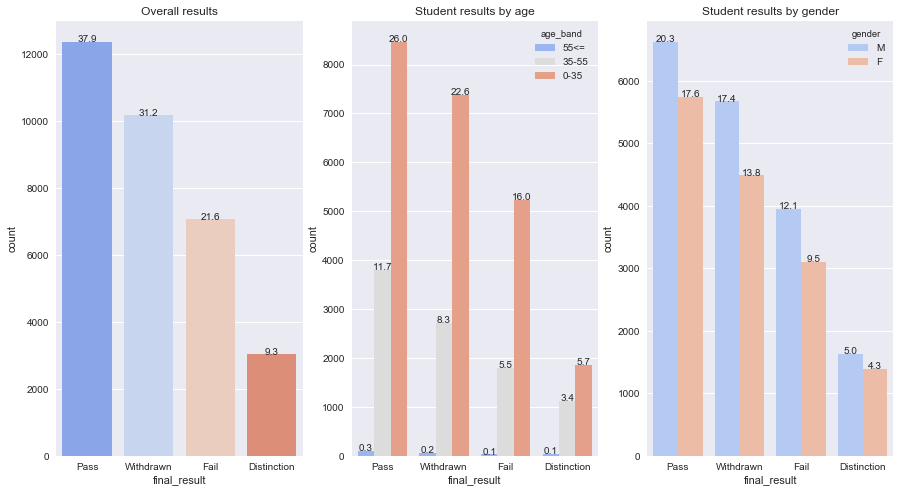

In [21]:
# plot all final results 
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(1,3,1)
g = sns.countplot('final_result', data=df, palette="coolwarm")
g.set_title("Overall results")
show_perc(ax1)

# view results by age 
ax2 = fig.add_subplot(1,3,2)
g = sns.countplot('final_result', data=df, palette="coolwarm", hue='age_band')
g.set_title("Student results by age")
show_perc(ax2)

# view results by gender
ax3 = fig.add_subplot(1,3,3)
g = sns.countplot('final_result', data=df, palette="coolwarm", hue='gender')
g.set_title("Student results by gender")
show_perc(ax3)

# Highest education achieved

We first look at all students and then in particular, at distribution based on disability

highest_education            age_band
A Level or Equivalent        0-35        10624
                             35-55        3381
                             55<=           40
HE Qualification             0-35         2612
                             35-55        1986
                             55<=          132
Lower Than A Level           0-35         9311
                             35-55        3814
                             55<=           33
No Formal quals              0-35          294
                             35-55          53
Post Graduate Qualification  0-35          103
                             35-55         199
                             55<=           11
dtype: int64


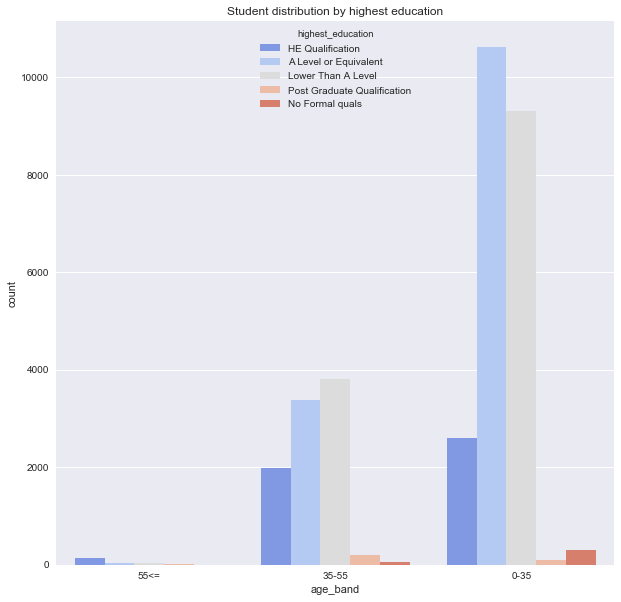

In [17]:
# highest education of students
print(df.groupby(['highest_education','age_band']).size())
g = sns.countplot('age_band', data=df, palette="coolwarm", hue='highest_education')
g.figure.set_size_inches(10,10)
g.set_title("Student distribution by highest education")

# Focus on disabled students

In [8]:
# view the analysis for disabled candidates
disabled = df[df['disability'] == 'Y']
not_disabled = df[df['disability'] == 'N']

print(disabled['gender'].value_counts())
print('So in all %3.2f percent disabled students are male' %((len(disabled[disabled.gender == 'M']))/(len(disabled))*100))
print('whereas %3.2f percent disabled students are female' %((len(disabled[disabled.gender == 'F']))/(len(disabled))*100))
print("-"*30)
print("Looking at highest education attained by disabled students")
print("-"*30)
print(disabled['highest_education'].value_counts())
print("-"*30)
print('Lower than A level: %3.2f percent' %((len(disabled[disabled.highest_education == 'Lower Than A Level']))/(len(disabled))*100))
print('A Level or Equivalent: %3.2f percent' %((len(disabled[disabled.highest_education == 'A Level or Equivalent']))/(len(disabled))*100))
print('HE Qualification: %3.2f percent' %((len(disabled[disabled.highest_education == 'HE Qualification']))/(len(disabled))*100))
print('No Formal quals : %3.2f percent' %((len(disabled[disabled.highest_education == 'No Formal quals']))/(len(disabled))*100))
print("-"*30)
print("Comparing it with all students:")
print("-"*30)
print(not_disabled['highest_education'].value_counts())
print("-"*30)
print('Lower than A level: %3.2f percent' %((len(not_disabled[not_disabled.highest_education == 'Lower Than A Level']))/(len(not_disabled))*100))
print('A Level or Equivalent: %3.2f percent' %((len(not_disabled[not_disabled.highest_education == 'A Level or Equivalent']))/(len(not_disabled))*100))
print('HE Qualification: %3.2f percent' %((len(not_disabled[not_disabled.highest_education == 'HE Qualification']))/(len(not_disabled))*100))
print('No Formal quals: %3.2f percent' %((len(not_disabled[not_disabled.highest_education == 'No Formal quals']))/(len(not_disabled))*100))



F    1621
M    1543
Name: gender, dtype: int64
So in all 48.77 percent disabled students are male
whereas 51.23 percent disabled students are female
------------------------------
Looking at highest education attained by disabled students
------------------------------
Lower Than A Level       1552
A Level or Equivalent    1432
HE Qualification          175
No Formal quals             5
Name: highest_education, dtype: int64
------------------------------
Lower than A level: 49.05 percent
A Level or Equivalent: 45.26 percent
HE Qualification: 5.53 percent
No Formal quals : 0.16 percent
------------------------------
Comparing it with all students:
------------------------------
A Level or Equivalent          12613
Lower Than A Level             11606
HE Qualification                4555
No Formal quals                  342
Post Graduate Qualification      313
Name: highest_education, dtype: int64
------------------------------
Lower than A level: 39.44 percent
A Level or Equivalent: 42.

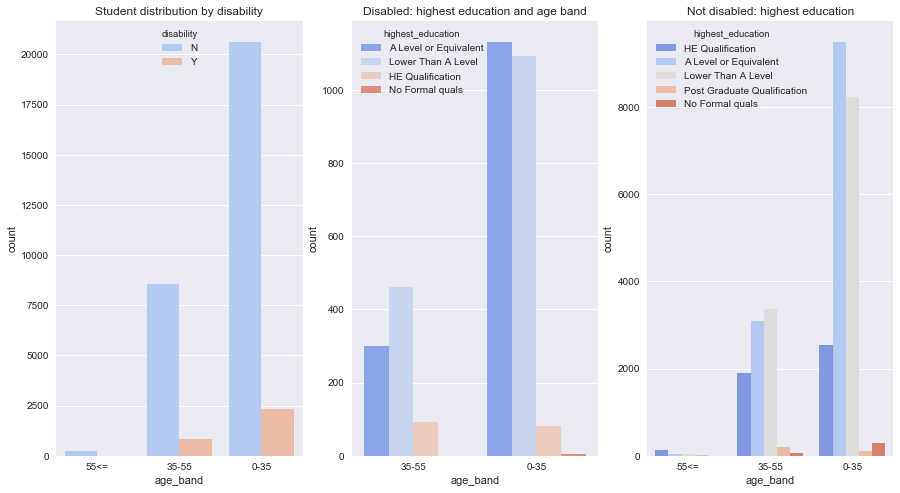

In [23]:
# visualise the above numbers
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(1,3,1)
g = sns.countplot('age_band', data=df, palette="coolwarm", hue='disability')
g.set_title("Student distribution by disability")

ax2 = fig.add_subplot(1,3,2)
g = sns.countplot('age_band', data=disabled, palette="coolwarm", hue='highest_education')
g.set_title("Disabled: highest education and age band")


ax3 = fig.add_subplot(1,3,3)
g = sns.countplot('age_band', data=not_disabled, palette="coolwarm", hue='highest_education')
g.set_title("Not disabled: highest education")


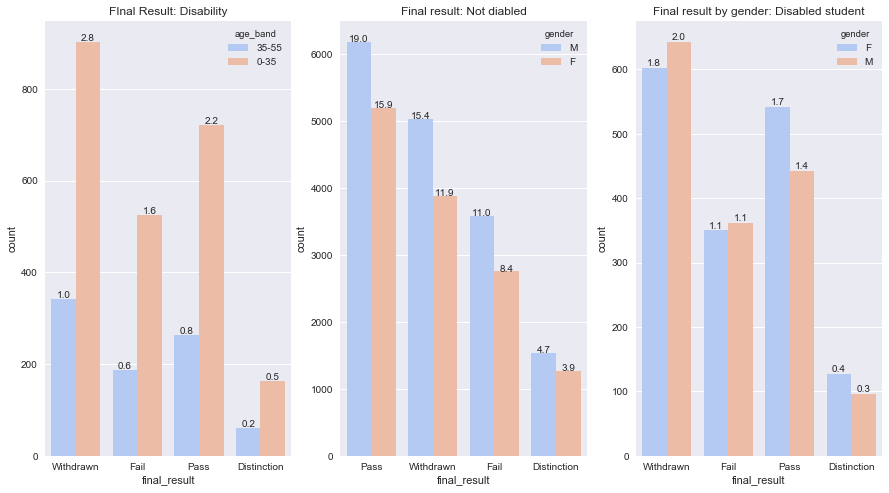

In [20]:
# plot all final results 
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(1,3,1)
g = sns.countplot('final_result', data=disabled, palette="coolwarm", hue='age_band')
g.set_title("FInal Result: Disability")
show_perc(ax1)

# view results by age 
ax2 = fig.add_subplot(1,3,2)
g = sns.countplot('final_result', data=not_disabled, palette="coolwarm", hue='gender')
g.set_title("Final result: Not diabled")
show_perc(ax2)

# view results by gender
ax3 = fig.add_subplot(1,3,3)
g = sns.countplot('final_result', data=disabled, palette="coolwarm", hue='gender')
g.set_title("Final result by gender: Disabled student")
show_perc(ax3)


# Observations:

    Very small percentage of disabled students with No FOrmal Quals have taken up Open univeristy courses.
    But neither have many of those who have HE Quals. 
    However, many of students who have completed A Levels have started Open Univeristy courses to achieve HE Quals.
    
    The surprising result is that 38% of disabled students withdrew compared to 27.3% of those who are not.
    Very few disabled students get distinction.
    More women achieve better results.

# A brief look at imd_bands

age_band  imd_band
0-35      0-10%       2509
          10-20       2618
          20-30%      2693
          30-40%      2489
          40-50%      2270
          50-60%      2168
          60-70%      1988
          70-80%      1944
          80-90%      1918
          90-100%     1675
35-55     0-10%        802
          10-20        892
          20-30%       945
          30-40%      1040
          40-50%       981
          50-60%       926
          60-70%       897
          70-80%       911
          80-90%       810
          90-100%      805
55<=      10-20          6
          20-30%        16
          30-40%        10
          40-50%         5
          50-60%        30
          60-70%        20
          70-80%        24
          80-90%        34
          90-100%       56
dtype: int64


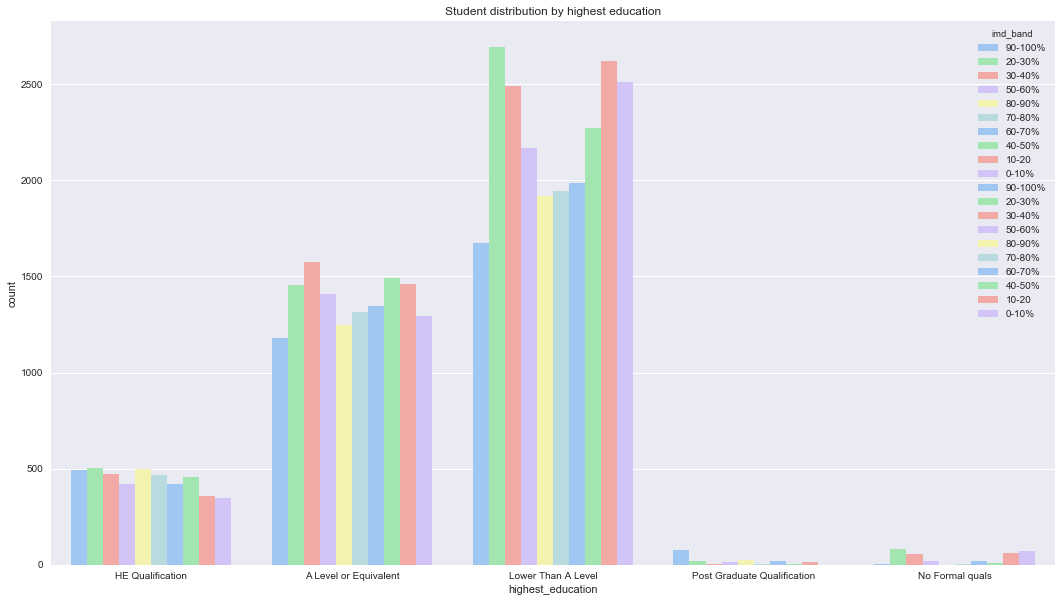

In [11]:
# imd_band of students
print(df.groupby(['age_band','imd_band']).size())
g = sns.countplot('age_band', data=df, palette="pastel", hue='imd_band')
g.figure.set_size_inches(18,10)
g.set_title("Student distribution by highest education")


g = sns.countplot('highest_education', data=df, palette="pastel", hue='imd_band')
g.figure.set_size_inches(18,10)
g.set_title("Student distribution by highest education")

In [28]:
# Look at scores
score = assessment['score']
score.head(5)

0    78.0
1    70.0
2    72.0
3    69.0
4    79.0
Name: score, dtype: float64

In [29]:
score.describe()

count    173739.000000
mean         75.799573
std          18.798107
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64

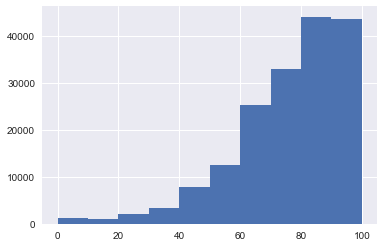

In [30]:
# to analyze if distribution is normal, plot the histogram
score.hist()

In [31]:
assessment.head(5)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
